## <center>Assignment</center>
In this assignment, we would like to predict the success of shots made by basketball players in the NBA.

In [1]:
import pandas as pd
import numpy as np
import warnings
import os

if not os.path.exists("output/"):
    os.mkdir("output/")
warnings.filterwarnings("ignore")

### 1. To download the dataset and split it

In [2]:
# download the dataset
import urllib.request

urllib.request.urlretrieve(
    "https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv",
    "./data/X_train.csv",
)
urllib.request.urlretrieve(
    "https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv",
    "./data/y_train.csv",
)
urllib.request.urlretrieve(
    "https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv",
    "./data/X_test.csv",
)

X_train = pd.read_csv("./data/X_train.csv")
y_train = pd.read_csv("./data/y_train.csv")
X_test = pd.read_csv("./data/X_test.csv")

In [3]:
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


In [4]:
X_train.head()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9


In [5]:
y_train.head()

,FGM
0,0
1,1
2,1
3,1
4,1


In [6]:
X_test.head()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,3,595,11.3,1,1.8,3.9,2,0.3
1,2,530,11.0,0,1.0,24.3,3,6.3
2,1,221,21.3,2,1.9,3.5,2,11.5
3,3,442,9.0,0,0.6,2.4,2,3.4
4,1,634,16.1,0,0.8,4.2,2,1.6


### 2. Find the models to train the data 

(a-1-1) Ridge Regression

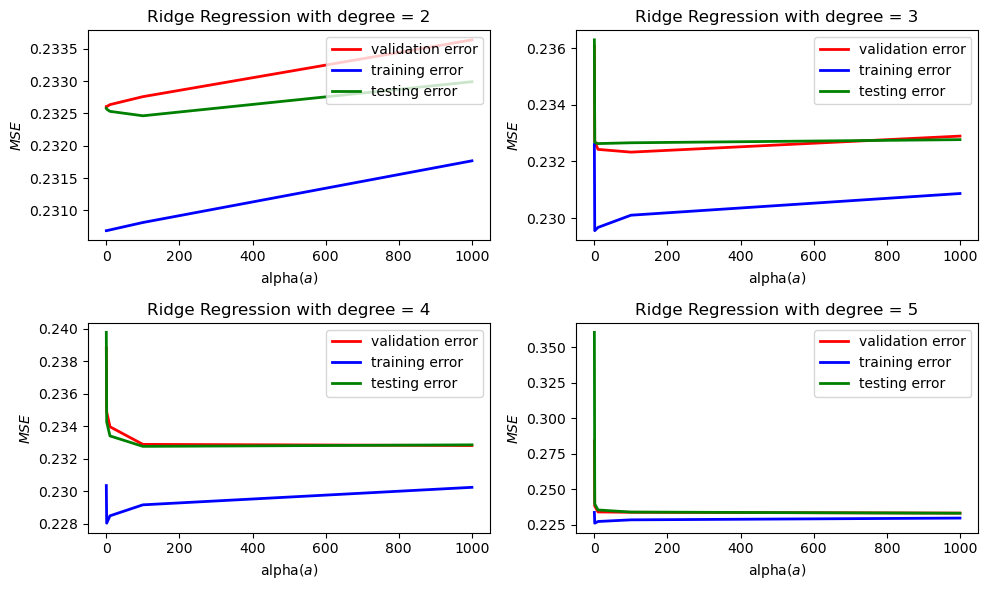


[The best degree = 3]
[The best Alpha = 100]
The best MSE : 0.2323261300


In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# create the polynomial features
best_degree = -1
best_alpha = -1
best_mse = float("inf")

plt.figure(figsize=(10, 6))

for d in range(2, 6):
    mse_train_list = []
    mse_test_list = []
    mse_valid_list = []

    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)

    # to standardize the data
    sc_x = StandardScaler()
    X_train_std = sc_x.fit_transform(X_train_poly)

    # to split the training data into validation data
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train_std, y_train, test_size=0.3, random_state=0
    )
    X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
        X_train_split, y_train_split, test_size=0.3, random_state=0
    )

    plt.subplot(2, 2, d - 1)
    for a in [0, 1, 10, 100, 1000]:
        lr_rg = Ridge(alpha=a)
        lr_rg.fit(X_train_split, y_train_split)

        y_train_pred = lr_rg.predict(X_train_split)
        y_test_pred = lr_rg.predict(X_test_split)
        y_valid_pred = lr_rg.predict(X_valid_split)

        mse_train = mean_squared_error(y_train_split, y_train_pred)
        mse_test = mean_squared_error(y_test_split, y_test_pred)
        mse_valid = mean_squared_error(y_valid_split, y_valid_pred)

        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
        mse_valid_list.append(mse_valid)

        if mse_valid < best_mse:
            best_mse = mse_valid
            best_degree = d
            best_alpha = a

        # print('\n[Degree = %d, Alpha = %d]' % (d, a) )
        # print('MSE train: %.10f' % mse_train)
        # print('MSE test: %.10f' % mse_test)
        # print('MSE valid: %.10f' % mse_valid)

    plt.plot(
        [0, 1, 10, 100, 1000],
        mse_valid_list,
        label="validation error",
        color="r",
        linewidth=2,
    )
    plt.plot(
        [0, 1, 10, 100, 1000],
        mse_train_list,
        label="training error",
        color="b",
        linewidth=2,
    )
    plt.plot(
        [0, 1, 10, 100, 1000],
        mse_test_list,
        label="testing error",
        color="g",
        linewidth=2,
    )
    plt.legend(loc="upper right")
    plt.xlabel("alpha($a$)")
    plt.ylabel("$MSE$")
    plt.title("Ridge Regression with degree = {}".format(d))
    file_name = "./output/Ridge Regression with degree " + str(d)
    plt.savefig(file_name, dpi=300)
plt.tight_layout()
plt.show()

print("\n[The best degree = %d]" % best_degree)
print("[The best Alpha = %d]" % best_alpha)
print("The best MSE : %.10f" % best_mse)

(a-1-2) Ridge Classifier

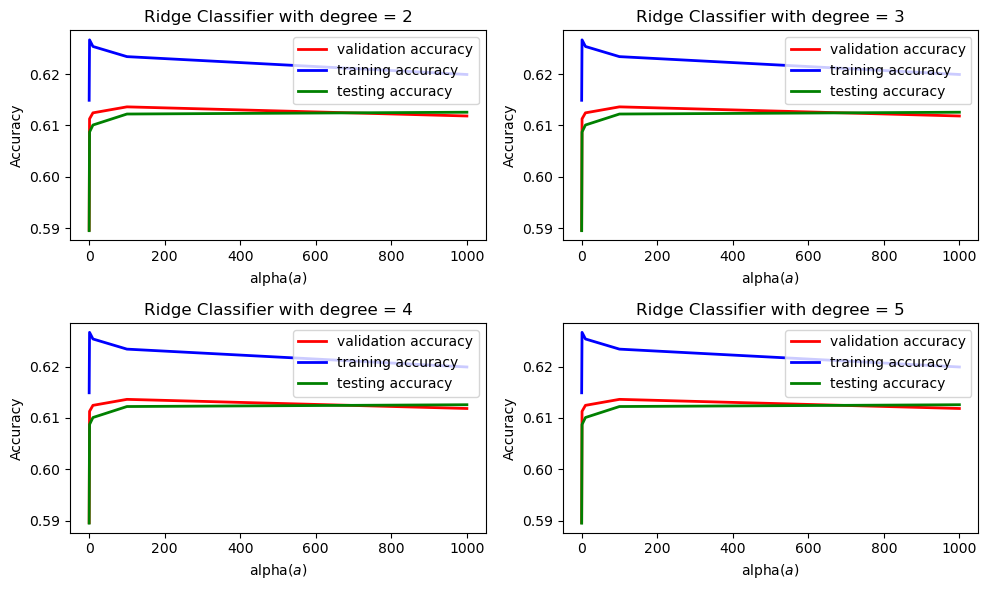


[The best degree = 2]
[The best Alpha = 100]
The best validation accuracy: 0.6136


In [8]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

# create a list to store the best results
best_degree = -1
best_alpha = -1
best_accuracy = 0.0  # You can use other classification metrics as well

plt.figure(figsize=(10, 6))

for d in range(2, 6):
    accuracy_train_list = []
    accuracy_test_list = []
    accuracy_valid_list = []

    plt.subplot(2, 2, d - 1)
    for a in [0, 1, 10, 100, 1000]:
        clf = RidgeClassifier(alpha=a)
        clf.fit(X_train_split, y_train_split)

        y_train_pred = clf.predict(X_train_split)
        y_test_pred = clf.predict(X_test_split)
        y_valid_pred = clf.predict(X_valid_split)

        accuracy_train = accuracy_score(y_train_split, y_train_pred)
        accuracy_test = accuracy_score(y_test_split, y_test_pred)
        accuracy_valid = accuracy_score(y_valid_split, y_valid_pred)

        accuracy_train_list.append(accuracy_train)
        accuracy_test_list.append(accuracy_test)
        accuracy_valid_list.append(accuracy_valid)

        if accuracy_valid > best_accuracy:
            best_accuracy = accuracy_valid
            best_degree = d
            best_alpha = a

    plt.plot(
        [0, 1, 10, 100, 1000],
        accuracy_valid_list,
        label="validation accuracy",
        color="r",
        linewidth=2,
    )
    plt.plot(
        [0, 1, 10, 100, 1000],
        accuracy_train_list,
        label="training accuracy",
        color="b",
        linewidth=2,
    )
    plt.plot(
        [0, 1, 10, 100, 1000],
        accuracy_test_list,
        label="testing accuracy",
        color="g",
        linewidth=2,
    )
    plt.legend(loc="upper right")
    plt.xlabel("alpha($a$)")
    plt.ylabel("Accuracy")
    plt.title("Ridge Classifier with degree = {}".format(d))
    file_name = "./output/Ridge Classifier with degree " + str(d)
    plt.savefig(file_name, dpi=300)
plt.tight_layout()
plt.show()

print("\n[The best degree = %d]" % best_degree)
print("[The best Alpha = %d]" % best_alpha)
print("The best validation accuracy: %.4f" % best_accuracy)

(a-2) Losso Regression

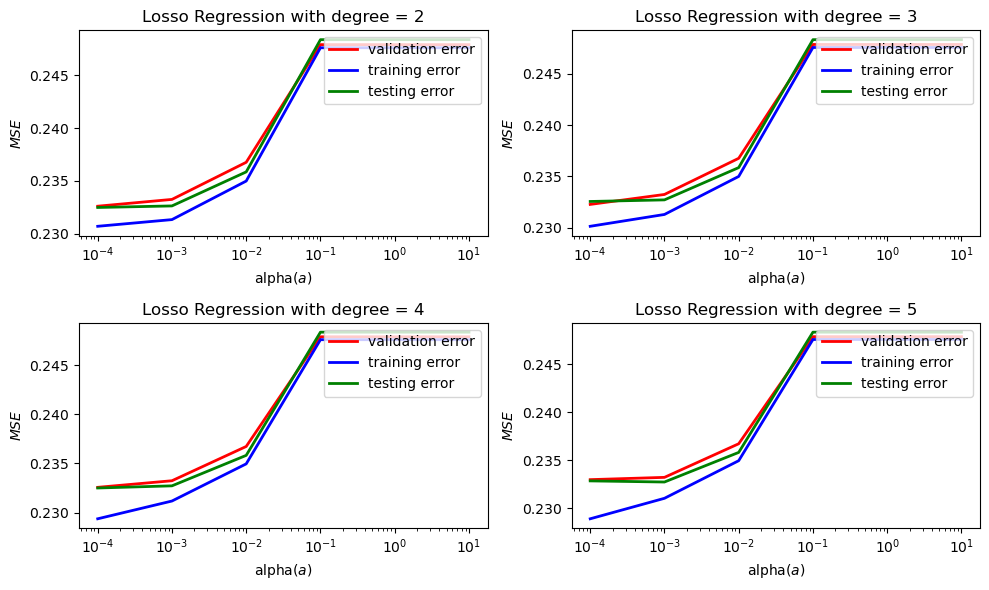


[The best degree = 3]
[The best Alpha = 0.0001]
The best MSE : 0.2322608272


In [9]:
from sklearn.linear_model import Lasso

# create the polynomial features
best_degree = -1
best_alpha = -1
best_mse = float("inf")

plt.figure(figsize=(10, 6))

for d in range(2, 6):
    mse_train_list = []
    mse_test_list = []
    mse_valid_list = []

    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)

    # to standardize the data
    sc_x = StandardScaler()
    X_train_std = sc_x.fit_transform(X_train_poly)

    # to split the training data into validation data
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train_std, y_train, test_size=0.3, random_state=0
    )
    X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
        X_train_split, y_train_split, test_size=0.3, random_state=0
    )

    plt.subplot(2, 2, d - 1)
    for a in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
        lr_rg = Lasso(alpha=a)
        lr_rg.fit(X_train_split, y_train_split)

        y_train_pred = lr_rg.predict(X_train_split)
        y_test_pred = lr_rg.predict(X_test_split)
        y_valid_pred = lr_rg.predict(X_valid_split)

        mse_train = mean_squared_error(y_train_split, y_train_pred)
        mse_test = mean_squared_error(y_test_split, y_test_pred)
        mse_valid = mean_squared_error(y_valid_split, y_valid_pred)

        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
        mse_valid_list.append(mse_valid)

        if mse_valid < best_mse:
            best_mse = mse_valid
            best_degree = d
            best_alpha = a

        # print('\n[Degree = %d, Alpha = %d]' % (d, a) )
        # print('MSE train: %.10f' % mean_squared_error(y_train_split, y_train_pred))
        # print('MSE test: %.10f' % mean_squared_error(y_test_split, y_test_pred))
        # print('MSE valid: %.10f' % mean_squared_error(y_valid_split, y_valid_pred))

    plt.xscale("log")
    plt.plot(
        [0.0001, 0.001, 0.01, 0.1, 1, 10],
        mse_valid_list,
        label="validation error",
        color="r",
        linewidth=2,
    )
    plt.plot(
        [0.0001, 0.001, 0.01, 0.1, 1, 10],
        mse_train_list,
        label="training error",
        color="b",
        linewidth=2,
    )
    plt.plot(
        [0.0001, 0.001, 0.01, 0.1, 1, 10],
        mse_test_list,
        label="testing error",
        color="g",
        linewidth=2,
    )
    plt.legend(loc="upper right")
    plt.xlabel("alpha($a$)")
    plt.ylabel("$MSE$")
    plt.title("Losso Regression with degree = {}".format(d))
    file_name = "./output/Losso Regression with degree " + str(d)
    plt.savefig(file_name, dpi=300)
plt.tight_layout()
plt.show()

print("\n[The best degree = %d]" % best_degree)
print("[The best Alpha = %.4f]" % best_alpha)
print("The best MSE : %.10f" % best_mse)

#### **We can find that Losso will give better performance:**

* Losso(0.2322608272) < Ridge(0.2323261300)

* Losso:
    * [The best degree = 3]
    * [The best Alpha = 0.0001]
    * The best MSE : 0.2322608272

### 3. Plot the error curve of Losso

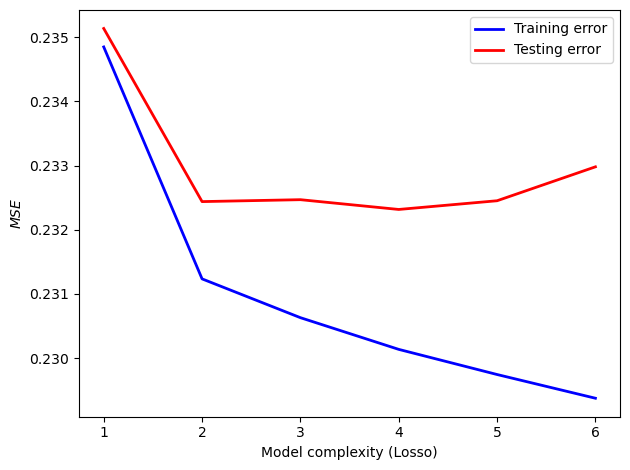

In [10]:
losso_train_mse = []
losso_test_mse = []
max_degree = 7

for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)

    # to standardize the data
    sc_x = StandardScaler()
    X_train_std = sc_x.fit_transform(X_train_poly)

    # to split the training data into validation data
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train_std, y_train, test_size=0.3, random_state=0
    )

    lr_rg = Lasso(alpha=0.0001)
    lr_rg.fit(X_train_split, y_train_split)

    y_train_pred = lr_rg.predict(X_train_split)
    y_test_pred = lr_rg.predict(X_test_split)

    mse_train = mean_squared_error(y_train_split, y_train_pred)
    mse_test = mean_squared_error(y_test_split, y_test_pred)

    losso_train_mse.append(mse_train)
    losso_test_mse.append(mse_test)

plt.plot(
    range(1, max_degree),
    losso_train_mse,
    label="Training error",
    color="blue",
    linewidth=2,
)
plt.plot(
    range(1, max_degree),
    losso_test_mse,
    label="Testing error",
    color="red",
    linewidth=2,
)
plt.legend(loc="upper right")
plt.xlabel("Model complexity (Losso)")
plt.ylabel("$MSE$")
plt.tight_layout()
plt.savefig("./output/fig-error-curve.png", dpi=300)
plt.show()

### 4. To Find the three most important features in the dataset

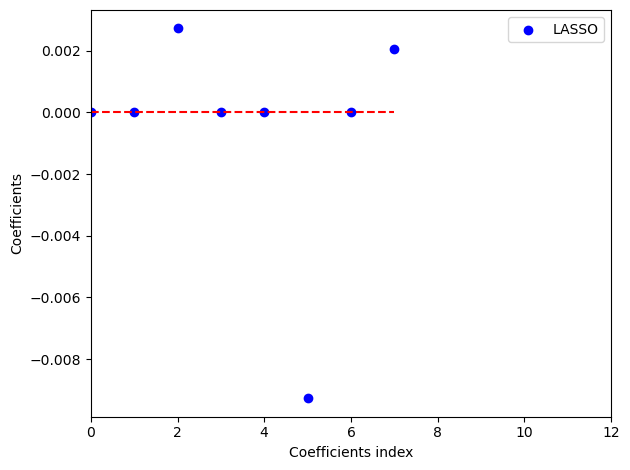

Selected attributes: ['SHOT_CLOCK' 'SHOT_DIST' 'CLOSE_DEF_DIST']


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# to use the lasso model
lr_lasso = Lasso(alpha=0.1)
lr_lasso.fit(X_train, y_train)

# to plot the scatter picture
var_num = X_train.shape[1]
plt.scatter(range(var_num), lr_lasso.coef_, label="LASSO", color="blue")
plt.hlines(y=0, xmin=0, xmax=var_num - 1, color="red", linestyle="--")
plt.xlim(0, 12)
plt.legend(loc="upper right")
plt.xlabel("Coefficients index")
plt.ylabel("Coefficients")
plt.tight_layout()
plt.show()

epsilon = 1e-4
idxs = np.where(abs(lr_lasso.coef_) > epsilon)
print("Selected attributes: {}".format(X_train.columns.values[idxs]))

### 5. To train the Losso regression using the three most important feature in the dataset

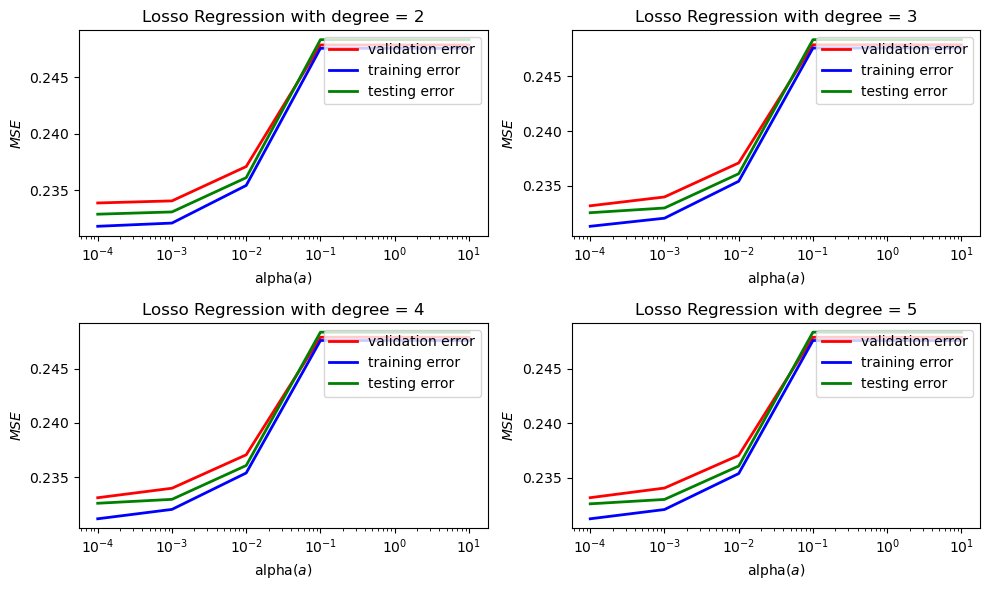


[The best degree = 4]
[The best Alpha = 0.0001]
The best MSE : 0.2331217518


In [12]:
# to get the import features in the dataset
X_train_reduce = X_train[['SHOT_CLOCK', 'SHOT_DIST', 'CLOSE_DEF_DIST']]

# Utilize the besr result regressor, which is Losso Regressor
# create the polynomial features
best_degree = -1
best_alpha = -1
best_mse = float("inf")

plt.figure(figsize=(10, 6))

for d in range(2, 6):
    mse_train_list = []
    mse_test_list = []
    mse_valid_list = []

    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train_reduce)
    
    # to standardize the data
    sc_x = StandardScaler()
    X_train_std = sc_x.fit_transform(X_train_poly)

    # to split the training data into validation data
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train_std, y_train, test_size=0.3, random_state=0
    )
    X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
        X_train_split, y_train_split, test_size=0.3, random_state=0
    )

    plt.subplot(2, 2, d - 1)
    for a in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
        lr_rg = Lasso(alpha=a)
        lr_rg.fit(X_train_split, y_train_split)

        y_train_pred = lr_rg.predict(X_train_split)
        y_test_pred = lr_rg.predict(X_test_split)
        y_valid_pred = lr_rg.predict(X_valid_split)

        mse_train = mean_squared_error(y_train_split, y_train_pred)
        mse_test = mean_squared_error(y_test_split, y_test_pred)
        mse_valid = mean_squared_error(y_valid_split, y_valid_pred)

        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
        mse_valid_list.append(mse_valid)

        if mse_valid < best_mse:
            best_mse = mse_valid
            best_degree = d
            best_alpha = a

        # print('\n[Degree = %d, Alpha = %d]' % (d, a) )
        # print('MSE train: %.10f' % mean_squared_error(y_train_split, y_train_pred))
        # print('MSE test: %.10f' % mean_squared_error(y_test_split, y_test_pred))
        # print('MSE valid: %.10f' % mean_squared_error(y_valid_split, y_valid_pred))

    plt.xscale("log")
    plt.plot(
        [0.0001, 0.001, 0.01, 0.1, 1, 10],
        mse_valid_list,
        label="validation error",
        color="r",
        linewidth=2,
    )
    plt.plot(
        [0.0001, 0.001, 0.01, 0.1, 1, 10],
        mse_train_list,
        label="training error",
        color="b",
        linewidth=2,
    )
    plt.plot(
        [0.0001, 0.001, 0.01, 0.1, 1, 10],
        mse_test_list,
        label="testing error",
        color="g",
        linewidth=2,
    )
    plt.legend(loc="upper right")
    plt.xlabel("alpha($a$)")
    plt.ylabel("$MSE$")
    plt.title("Losso Regression with degree = {}".format(d))
    file_name = "./output/Losso Regression with degree " + str(d)
    plt.savefig(file_name, dpi=300)
plt.tight_layout()
plt.show()

print("\n[The best degree = %d]" % best_degree)
print("[The best Alpha = %.4f]" % best_alpha)
print("The best MSE : %.10f" % best_mse)

### 6. To predict the testing data

In [13]:
# to get the import features in the dataset
X_test_reduce = X_test[['SHOT_CLOCK', 'SHOT_DIST', 'CLOSE_DEF_DIST']]

# to specify the degree of polynomial
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train_reduce)
X_test_poly = poly.transform(X_test_reduce)

# to standardize the data
sc_x = StandardScaler()
X_train_std = sc_x.fit_transform(X_train_poly)
X_test_std = sc_x.transform(X_test_poly)

# to introduce the losso regression
lr_rg = Lasso(alpha=0.0001)
lr_rg.fit(X_train_std, y_train)

y_test_pred = lr_rg.predict(X_test_std)
df_pred = pd.DataFrame(y_test_pred, columns=['FGM'])
df_pred.to_csv('./output/test_pred.csv', index=False)


In [14]:
y_pred = pd.read_csv('./output/test_pred.csv')
y_pred.head()

,FGM
0,0.419927
1,0.378420
2,1.016303
3,0.663873
4,0.516291


## <center>Report</center>

#### 1. The model used:

a. **Ridge Regressor**

- The best degree = 3
- The best Alpha = 100
- The best MSE : 0.2323261300

<br>

b. **Ridge Classifier**

- The best degree = 2
- The best Alpha = 100
- The best validation accuracy: 0.6136

<br>

c. **Losso Regressor** (Best)

- The best degree = 3
- The best Alpha = 0.0001
- The best MSE : 0.2322608272

<br>

#### 2. Data spliting methid

原先的data共分為三個: X_train, y_train, X_test。可以發現X_test沒有y_test這個dataset，因此我們在訓練時必須使用X_train以及X_test來進行spliting的動作。

- (a) X_train_split, X_test_split, y_train_split, y_test_split = train_test_split( X_train_std, y_train, test_size=0.3, random_state=0)

        一開始會先將X_train以及y_train分割為training data以及testing data

- (b) X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split( X_train_split, y_train_split, test_size=0.3, random_state=0)

        接著我會再將剛剛分到的training data再次分割為training data以及validation data

經過這兩個分割，我就可以很順利的得到training data, testing data以及validation data了

<br>

#### 3. Avoid Overfitting

為了避免overfitting的情況發生，我也有針對會產生最好結果的Losso Regressor進行overfitting的測試(利用tune好的parameter，針對degree進行error curve的繪製)。由結果可以發現沒有overfitting的情況發生

<br>

#### 4. Feature selection

我在這邊是使用Losso來進行feature selection。經過測試可以發現，當α設定為0.1時，可以順利的得到3個比較重要的feature，分別為'SHOT_CLOCK', 'SHOT_DIST', 'CLOSE_DEF_DIST'。

<br>

#### 5. Testing

經過前面的測試，我們可以發現利用Losso Regressor並且將參數設為d=3, α=0.001時可以有最好的效果。因此我利用前面選取的3個重要的feature並且利用Losso來進行training，最後得到的結果為MSE=0.2331217518。

<br>

#### 6. Output the prediction result

有了上一部的model，我就可以針對X_test的dataset進行prediction，並且將結果輸出至test_pred.csv。